In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import warnings

from sklearn.preprocessing import LabelEncoder
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

# Evaluating the model
from sklearn.metrics import mean_squared_error, r2_score

warnings.filterwarnings('ignore')


In [56]:
#Data reading 
Phy_Che = pd.read_pickle('/Users/lidiayung/PhD_project/project_PONDERFUL/ponderful_OUTPUT/Phy_Che_qt.pkl')
display(Phy_Che)

,Pond_ID,PondCode,X,Y,Pondscape,Country,Strat_Survey,Resampling,season_col,pH,...,Aquatic_500.t,Cropland_500.t,Forest_500.t,Pastures.and.open.nature_500.t,Urban_500.t,Aquatic_500_qt,Cropland_500_qt,Forest_500_qt,Pastures.and.open.nature_500_qt,Urban_500_qt
1,BE048,AW1_NA1,5.032370,51.327590,Antwerp,Belgium,1,0,Spring,6.355,...,-0.635657,-0.402250,0.910612,-0.067940,-0.654950,0.000000,-0.570731,0.899016,-0.067940,-2.393980
2,BE049,AW1_IN2,5.002750,51.329040,Antwerp,Belgium,1,0,Spring,6.305,...,0.849086,-0.459558,1.063622,-0.346234,0.579132,0.210428,-0.639147,1.052930,-0.346234,0.318639
3,BE050,AW1_EX1,5.032560,51.362150,Antwerp,Belgium,1,0,Spring,6.005,...,-0.635657,0.357345,0.357345,-0.036563,-0.183805,0.000000,0.271036,0.341070,-0.036563,-0.718868
4,BE051,AW1_NA2,4.922010,51.358100,Antwerp,Belgium,1,0,Spring,7.195,...,1.120502,-0.152026,0.413601,0.459558,0.078412,0.593821,-0.282875,0.397935,0.459558,-0.318639
5,BE052,AW1_IN1,5.016750,51.343080,Antwerp,Belgium,1,0,Spring,5.900,...,-0.635657,-0.026114,0.269558,0.591528,-0.554602,0.000000,-0.142907,0.252250,0.591528,-1.618497
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
236,URG026,VCL2,-54.749753,-34.383481,Valle del Cordillera,Uruguay,1,1,Spring,7.880,...,-0.635657,-1.731664,-0.776422,1.665398,-1.150349,0.000000,0.000000,-0.822105,1.665398,0.000000
237,URG027,VCL3,-54.747753,-34.384983,Valle del Cordillera,Uruguay,1,1,Spring,7.800,...,-0.635657,-1.731664,-0.194437,1.343325,-1.150349,0.000000,0.000000,-0.219486,1.343325,0.000000
238,URG028,VCH1,-54.759703,-34.383453,Valle del Cordillera,Uruguay,1,1,Spring,9.610,...,-0.635657,-0.335166,-1.181259,1.369531,-0.390951,0.000000,-0.491989,-1.260117,1.369531,-1.123769
239,URG029,VCH2,-54.767964,-34.379486,Valle del Cordillera,Uruguay,1,1,Spring,8.470,...,-0.635657,-0.324138,-0.604016,1.140287,-1.150349,0.000000,-0.479169,-0.641518,1.140287,0.000000


In [ ]:
 [
       'Animals_cont_qt', 'Natural_5_qt','Aquatic_500_qt', 'Cropland_500_qt', 'Forest_500_qt',
       'Pastures.and.open.nature_500_qt','Urban_500_qt']

In [46]:
import matplotlib.pyplot as plt

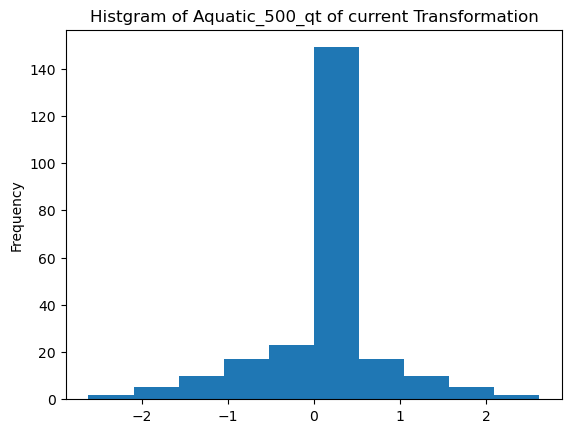

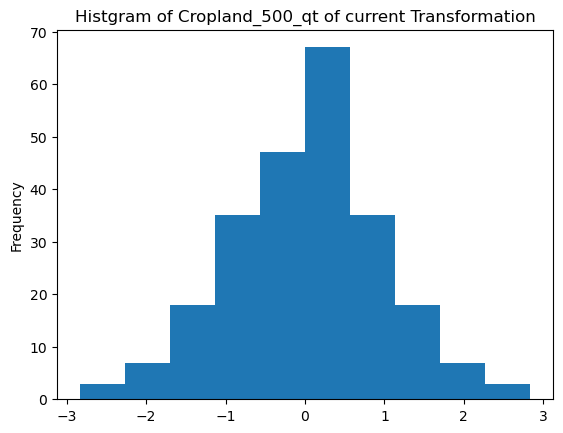

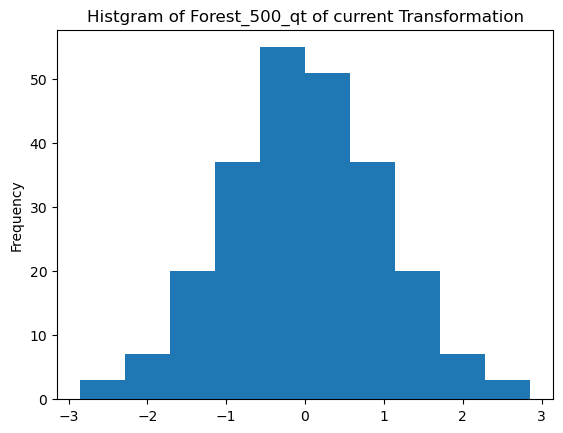

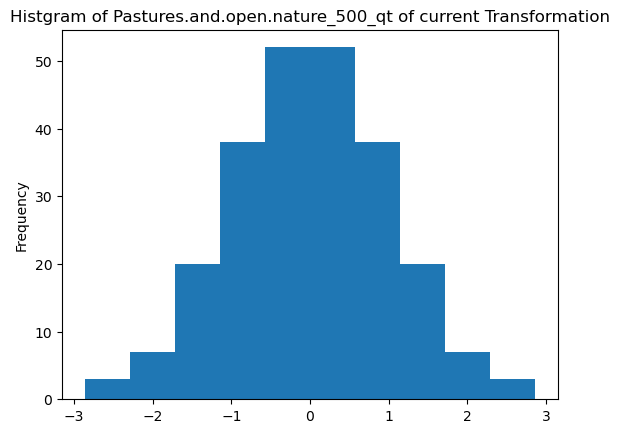

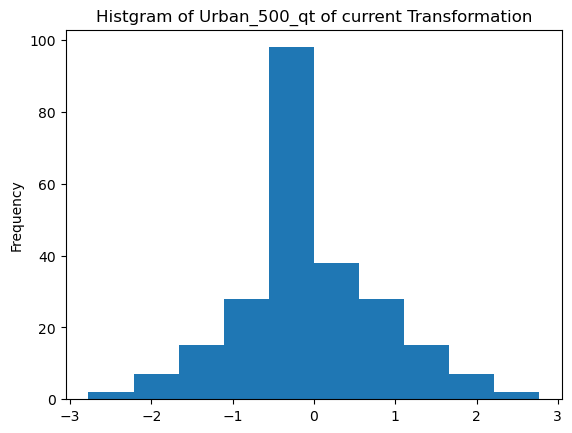

In [60]:
for i in [
       'Aquatic_500_qt', 'Cropland_500_qt', 'Forest_500_qt',
       'Pastures.and.open.nature_500_qt','Urban_500_qt']:
       plt.figure()
       Phy_Che[i].plot.hist()
       plt.title(f'Histgram of {i} of current Transformation')


In [4]:
Phy_Che.columns

Index(['Pond_ID', 'PondCode', 'X', 'Y', 'Pondscape', 'Country', 'Strat_Survey',
       'Resampling', 'season_col', 'pH', 'O2_con', 'O2_sat', 'Turb', 'Sludge',
       'Snel', 'Cond', 'T', 'TN', 'TP', 'DOC', 'TOC', 'CHLa', 'PC',
       'Sulphates', 'Chlorides', 'Alkalinity', 'Ca', 'Mg', 'Na', 'K', 'TSS',
       'N.NO3', 'P.PO4', 'N.NH4', 'N.NO2', 'CHLa_Spectro', 'N.NO23', 'Fe',
       'Secchi_Depth', 'CHLa_RFU', 'PC_RFU', 'TDN', 'OM', 'year',
       'Hydeoperiod_length', 'bio1', 'bio4', 'bio5', 'bio6', 'bio7', 'bio12',
       'bio15', 'bio17', 'Nat_res', 'Area', 'Depth', 'Pond_dries',
       'Rel_waterlev', 'PVI', 'Animals_cont', 'lifestockQ', 'Natural_5',
       'Aquatic_500', 'Cropland_500', 'Forest_500',
       'Pastures.and.open.nature_500', 'Urban_500', 'ECELS', 'bio1.t',
       'bio4.t', 'bio5.t', 'bio6.t', 'bio7.t', 'bio12.t', 'bio15.t', 'bio17.t',
       'Area.t', 'Depth.t', 'Animals_cont.t', 'Hydeoperiod_length.t',
       'ECELS.t', 'Natural_5.t', 'Aquatic_500.t', 'Cropland_500.

In [61]:
vars=['Pond_ID', 'PondCode', 'Pondscape', 'Country', 'Strat_Survey',
       'Resampling', 'season_col','Area.t', 'Depth.t','TN', 'TP','bio1.t', 'bio4.t', 'bio5.t','bio12.t','Hydeoperiod_length.t',
       'Animals_cont.t', 'Natural_5.t','Aquatic_500_qt', 'Cropland_500_qt', 'Forest_500_qt',
       'Pastures.and.open.nature_500_qt','Urban_500_qt',]
Phy_Che_random_forest_df = Phy_Che[vars]
display(Phy_Che_random_forest_df)

,Pond_ID,PondCode,Pondscape,Country,Strat_Survey,Resampling,season_col,Area.t,Depth.t,TN,...,bio5.t,bio12.t,Hydeoperiod_length.t,Animals_cont.t,Natural_5.t,Aquatic_500_qt,Cropland_500_qt,Forest_500_qt,Pastures.and.open.nature_500_qt,Urban_500_qt
1,BE048,AW1_NA1,Antwerp,Belgium,1,0,Spring,7.247081,-0.667948,1.30,...,-0.324138,0.318639,0.487558,0.390951,-1.354013,0.000000,-0.570731,0.899016,-0.067940,-2.393980
2,BE049,AW1_IN2,Antwerp,Belgium,1,0,Spring,6.510261,-0.542462,3.20,...,-0.368501,0.318639,0.487558,0.390951,-0.152667,0.210428,-0.639147,1.052930,-0.346234,0.318639
3,BE050,AW1_EX1,Antwerp,Belgium,1,0,Spring,7.475340,-0.864160,1.85,...,-0.379702,0.318639,0.487558,0.390951,0.057716,0.000000,0.271036,0.341070,-0.036563,-0.718868
4,BE051,AW1_NA2,Antwerp,Belgium,1,0,Spring,5.886112,-1.082193,3.60,...,-0.530402,0.362917,0.487558,0.390951,-1.753607,0.593821,-0.282875,0.397935,0.459558,-0.318639
5,BE052,AW1_IN1,Antwerp,Belgium,1,0,Spring,9.047821,-1.140287,2.65,...,-0.346234,0.318639,0.487558,0.390951,-0.308999,0.000000,-0.142907,0.252250,0.591528,-1.618497
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
236,URG026,VCL2,Valle del Cordillera,Uruguay,1,1,Spring,6.430480,0.390951,0.58,...,0.797777,0.841621,0.487558,0.942702,-1.753607,0.000000,0.000000,-0.822105,1.665398,0.000000
237,URG027,VCL3,Valle del Cordillera,Uruguay,1,1,Spring,5.133831,0.109886,0.56,...,0.797777,0.841621,0.487558,0.942702,-1.354013,0.000000,0.000000,-0.219486,1.343325,0.000000
238,URG028,VCH1,Valle del Cordillera,Uruguay,1,1,Spring,8.553309,0.291285,2.00,...,0.797777,0.841621,0.487558,1.454408,-1.753607,0.000000,-0.491989,-1.260117,1.369531,-1.123769
239,URG029,VCH2,Valle del Cordillera,Uruguay,1,1,Spring,6.587290,-0.335166,1.05,...,0.797777,0.841621,0.487558,1.454408,-1.753607,0.000000,-0.479169,-0.641518,1.140287,0.000000


In [62]:
#UK lancaster has NA values for both TP and TP
Phy_Che_random_forest_df.dropna(inplace=True)

### TP Tree

In [63]:
# Split the data into features (X) and target (y)
X = Phy_Che_random_forest_df[['Area.t', 'Depth.t','bio1.t', 'bio4.t', 'bio5.t','bio12.t','Hydeoperiod_length.t',
       'Animals_cont.t', 'Natural_5.t','Aquatic_500_qt', 'Cropland_500_qt', 'Forest_500_qt',
       'Pastures.and.open.nature_500_qt','Urban_500_qt']]

y = Phy_Che_random_forest_df['TP']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [64]:

# Fitting Random Forest Regression to the dataset
regressor = RandomForestRegressor(n_estimators=10, random_state=0, oob_score=True,max_depth=4,
ccp_alpha=0.01)
 
# Fit the regressor with x and y data
regressor.fit(X_train, y_train)

RandomForestRegressor(ccp_alpha=0.01, max_depth=4, n_estimators=10,
                      oob_score=True, random_state=0)

In [65]:
print('Parameters currently in use:\n')
print(regressor.get_params())

Parameters currently in use:

{'bootstrap': True, 'ccp_alpha': 0.01, 'criterion': 'squared_error', 'max_depth': 4, 'max_features': 1.0, 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'n_estimators': 10, 'n_jobs': None, 'oob_score': True, 'random_state': 0, 'verbose': 0, 'warm_start': False}


### Fitting and evaluating the model

In [67]:


# Access the OOB Score
oob_score = regressor.oob_score_
print(f'Out-of-Bag Score: {oob_score}')

# Making predictions on the same data or new data
predictions = regressor.predict(X)

# Evaluating the model
mse = mean_squared_error(y, predictions)
print(f'Mean Squared Error: {mse}')

r2 = r2_score(y, predictions)
print(f'R-squared: {r2}')


Out-of-Bag Score: -0.1882322198279871
Mean Squared Error: 0.14293984932940257
R-squared: 0.43286035668029643


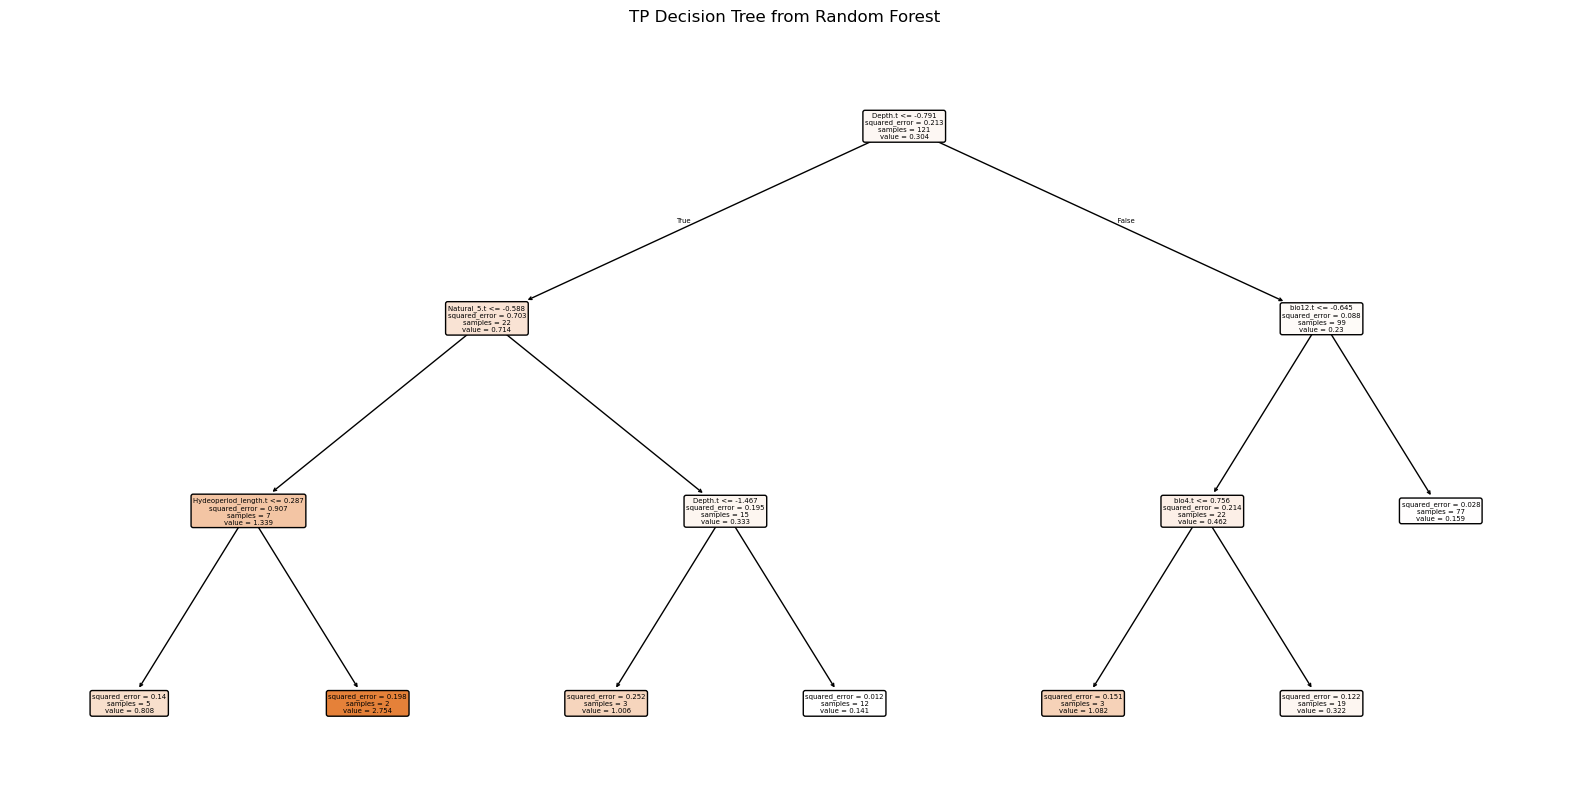

In [71]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Assuming regressor is your trained Random Forest model
# Pick one tree from the forest, e.g., the first tree (index 0)
tree_to_plot = regressor.estimators_[0]

# Plot the decision tree
plt.figure(figsize=(20, 10))
plot_tree(tree_to_plot, feature_names=X.columns.tolist(), filled=True, rounded=True, fontsize=5)
plt.title("TP Decision Tree from Random Forest")
plt.show()


Out-of-Bag Score: -0.07363788167589624
Mean Squared Error: 0.11362823914333219
R-squared: 0.5491594588833841


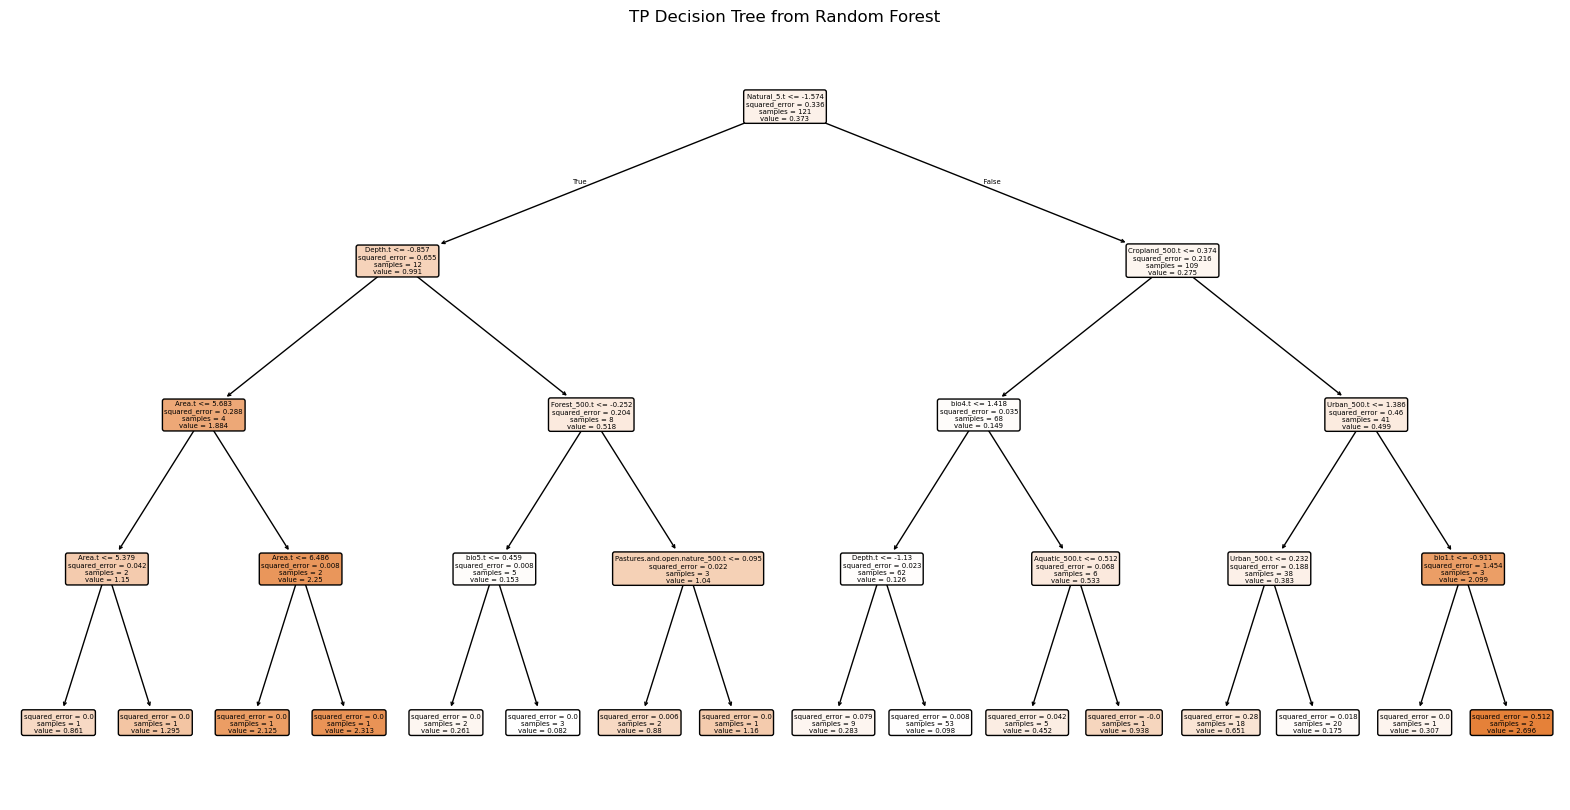

In [29]:
# Split the data into features (X) and target (y)
X = Phy_Che_random_forest_df[['Area_qt', 'Depth_qt','bio1_qt', 'bio4_qt', 'bio5_qt','bio12_qt','Hydeoperiod_length_qt',
       'Animals_cont_qt', 'Natural_5_qt','Aquatic_500_qt', 'Cropland_500_qt', 'Forest_500_qt',
       'Pastures.and.open.nature_500_qt','Urban_500_qt']]

y = Phy_Che_random_forest_df['TP']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Fitting Random Forest Regression to the dataset
regressor = RandomForestRegressor(n_estimators=10, random_state=0, oob_score=True,max_depth=4)
 
# Fit the regressor with x and y data
regressor.fit(X_train, y_train)

# Evaluating the model

# Access the OOB Score
oob_score = regressor.oob_score_
print(f'Out-of-Bag Score: {oob_score}')

# Making predictions on the same data or new data
predictions = regressor.predict(X)

# Evaluating the model
mse = mean_squared_error(y, predictions)
print(f'Mean Squared Error: {mse}')

r2 = r2_score(y, predictions)
print(f'R-squared: {r2}')


# Assuming regressor is your trained Random Forest model
# Pick one tree from the forest, e.g., the first tree (index 0)
tree_to_plot = regressor.estimators_[0]

# Plot the decision tree
plt.figure(figsize=(20, 10))
plot_tree(tree_to_plot, feature_names=X.columns_qtolist(), filled=True, rounded=True, fontsize=5)
plt_qtitle("TP Decision Tree from Random Forest")
plt.show()

Out-of-Bag Score: -0.19254414129051312
Mean Squared Error: 0.09790572765260853
R-squared: 0.6115413600870869


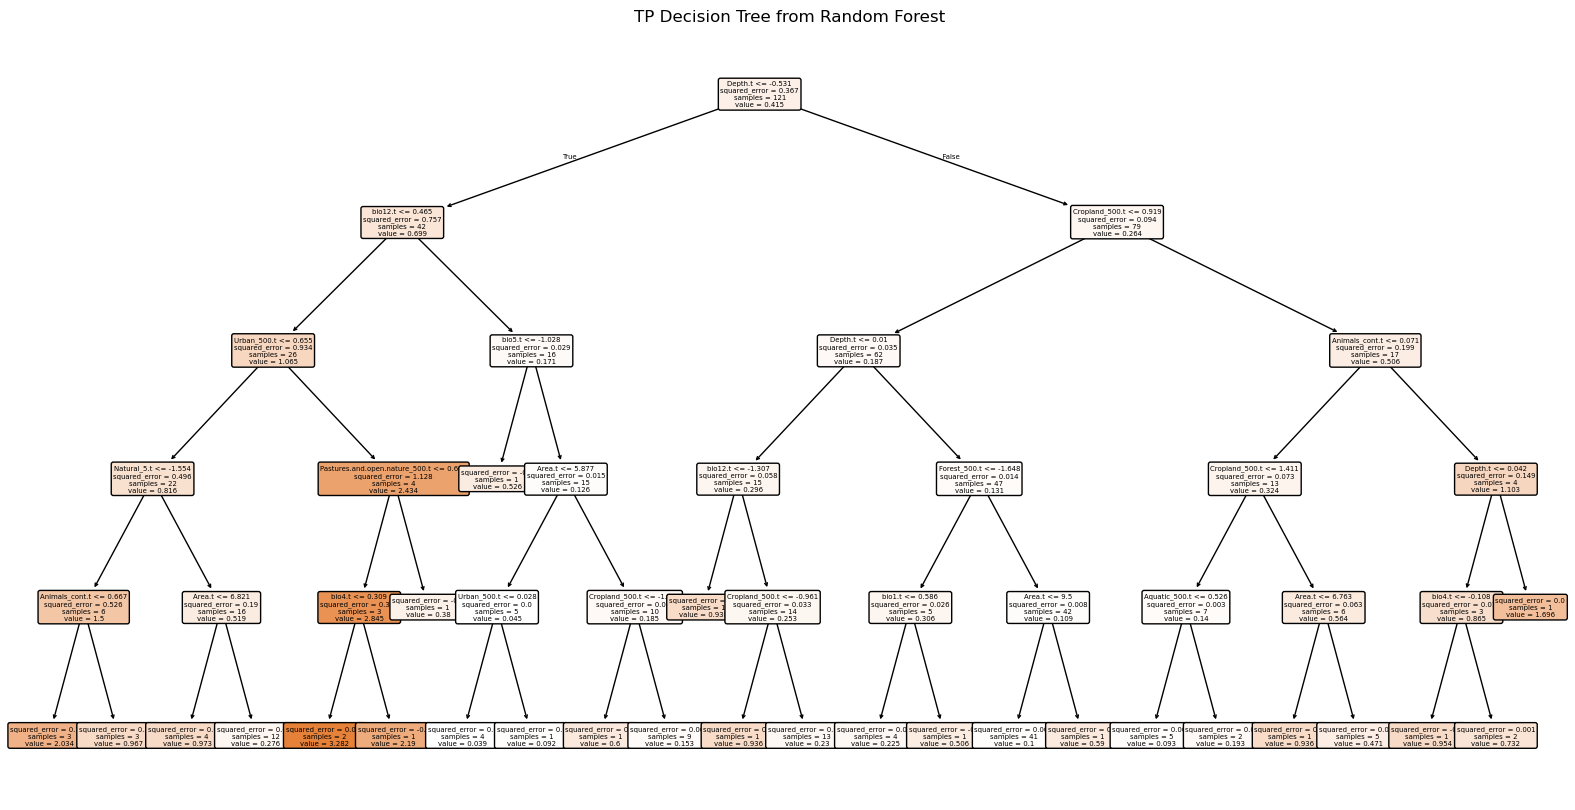

In [30]:
# Split the data into features (X) and target (y)
X = Phy_Che_random_forest_df[['Area_qt', 'Depth_qt','bio1_qt', 'bio4_qt', 'bio5_qt','bio12_qt','Hydeoperiod_length_qt',
       'Animals_cont_qt', 'Natural_5_qt','Aquatic_500_qt', 'Cropland_500_qt', 'Forest_500_qt',
       'Pastures.and.open.nature_500_qt','Urban_500_qt']]

y = Phy_Che_random_forest_df['TP']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Fitting Random Forest Regression to the dataset
regressor = RandomForestRegressor(n_estimators=10, random_state=0, oob_score=True,max_depth=5)
 
# Fit the regressor with x and y data
regressor.fit(X_train, y_train)

# Evaluating the model

# Access the OOB Score
oob_score = regressor.oob_score_
print(f'Out-of-Bag Score: {oob_score}')

# Making predictions on the same data or new data
predictions = regressor.predict(X)

# Evaluating the model
mse = mean_squared_error(y, predictions)
print(f'Mean Squared Error: {mse}')

r2 = r2_score(y, predictions)
print(f'R-squared: {r2}')


# Assuming regressor is your trained Random Forest model
# Pick one tree from the forest, e.g., the first tree (index 0)
tree_to_plot = regressor.estimators_[0]

# Plot the decision tree
plt.figure(figsize=(20, 10))
plot_tree(tree_to_plot, feature_names=X.columns_qtolist(), filled=True, rounded=True, fontsize=5)
plt_qtitle("TP Decision Tree from Random Forest")
plt.show()

## TN tree

In [22]:
# Split the data into features (X) and target (y)
X = Phy_Che_random_forest_df[['Area_qt', 'Depth_qt','bio1_qt', 'bio4_qt', 'bio5_qt','bio12_qt','Hydeoperiod_length_qt',
       'Animals_cont_qt', 'Natural_5_qt','Aquatic_500_qt', 'Cropland_500_qt', 'Forest_500_qt',
       'Pastures.and.open.nature_500_qt','Urban_500_qt']]

y = Phy_Che_random_forest_df['TN']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


In [23]:

regressor.fit(X_train, y_train)

RandomForestRegressor(max_depth=3, n_estimators=10, oob_score=True,
                      random_state=0)

### Fitting and evaluating the model

In [24]:

# Access the OOB Score
oob_score = regressor.oob_score_
print(f'Out-of-Bag Score: {oob_score}')

# Making predictions on the same data or new data
predictions = regressor.predict(X)

# Evaluating the model
mse = mean_squared_error(y, predictions)
print(f'Mean Squared Error: {mse}')

r2 = r2_score(y, predictions)
print(f'R-squared: {r2}')


Out-of-Bag Score: -0.3025442378048935
Mean Squared Error: 1.0743405114534592
R-squared: 0.4237129407618565


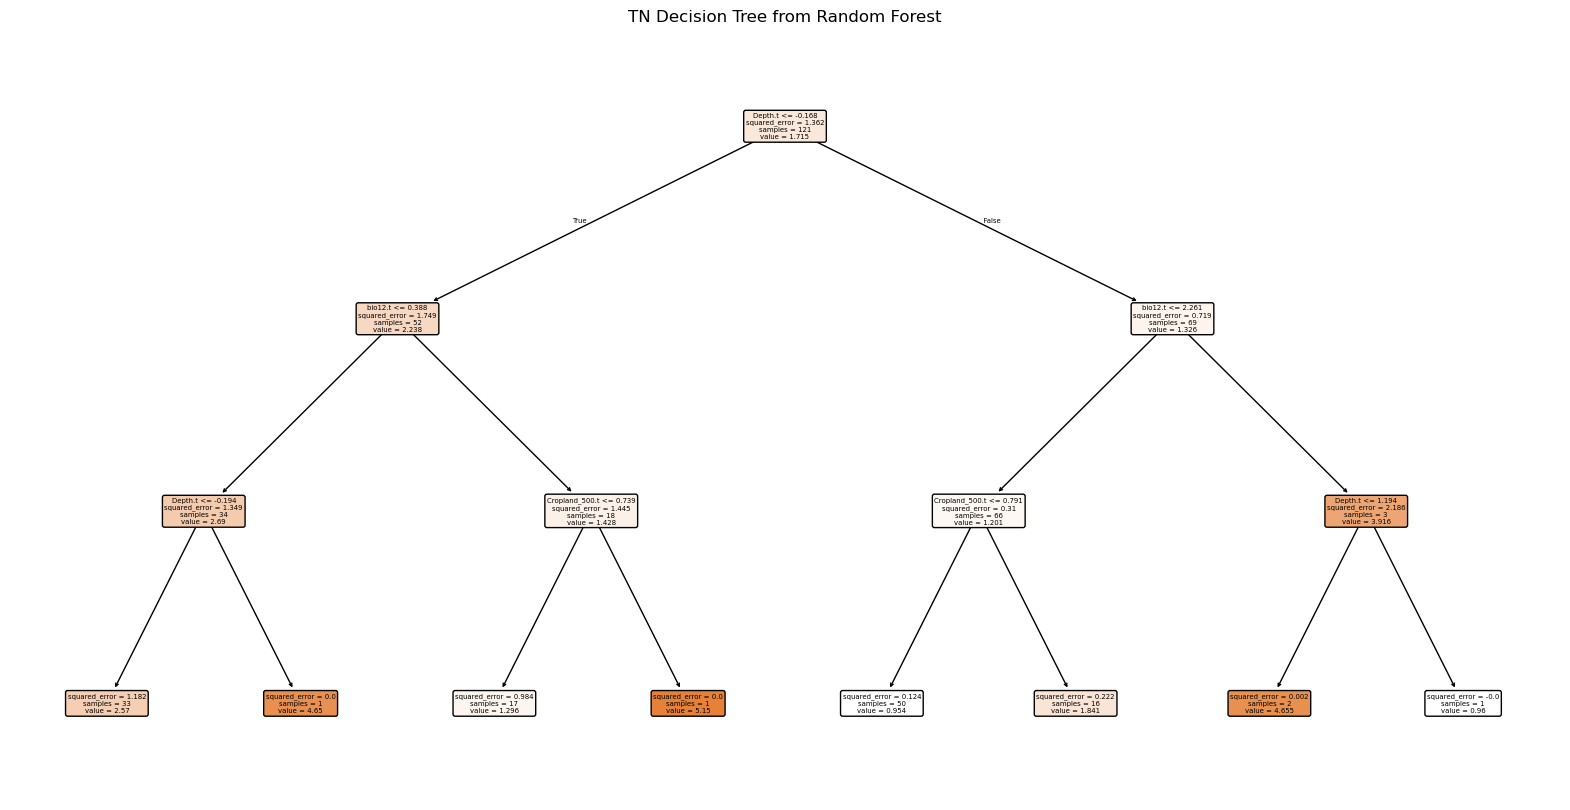

In [25]:

# Assuming regressor is your trained Random Forest model
# Pick one tree from the forest, e.g., the first tree (index 0)
tree_to_plot = regressor.estimators_[0]

# Plot the decision tree
plt.figure(figsize=(20, 10))
plot_tree(tree_to_plot, feature_names=X.columns_qtolist(), filled=True, rounded=True, fontsize=5)
plt_qtitle("TN Decision Tree from Random Forest")
plt.show()


Out-of-Bag Score: 0.09847856905244001
Mean Squared Error: 0.9719934872024725
R-squared: 0.47861291427917396


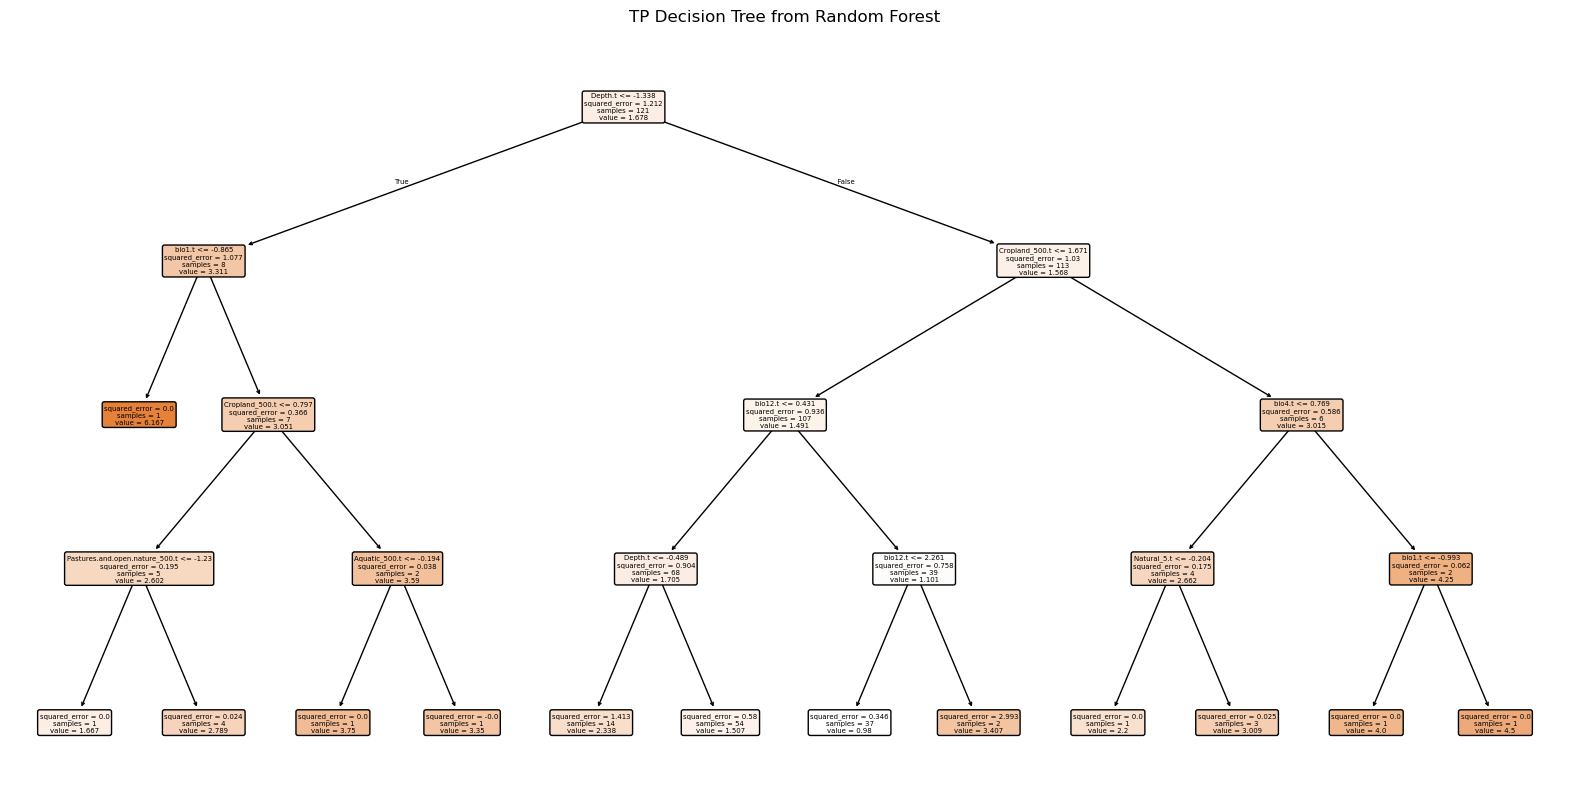

In [31]:
# Split the data into features (X) and target (y)
X = Phy_Che_random_forest_df[['Area_qt', 'Depth_qt','bio1_qt', 'bio4_qt', 'bio5_qt','bio12_qt','Hydeoperiod_length_qt',
       'Animals_cont_qt', 'Natural_5_qt','Aquatic_500_qt', 'Cropland_500_qt', 'Forest_500_qt',
       'Pastures.and.open.nature_500_qt','Urban_500_qt']]

y = Phy_Che_random_forest_df['TN']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Fitting Random Forest Regression to the dataset
regressor = RandomForestRegressor(n_estimators=10, random_state=0, oob_score=True,max_depth=4)
 
# Fit the regressor with x and y data
regressor.fit(X_train, y_train)

# Evaluating the model

# Access the OOB Score
oob_score = regressor.oob_score_
print(f'Out-of-Bag Score: {oob_score}')

# Making predictions on the same data or new data
predictions = regressor.predict(X)

# Evaluating the model
mse = mean_squared_error(y, predictions)
print(f'Mean Squared Error: {mse}')

r2 = r2_score(y, predictions)
print(f'R-squared: {r2}')


# Assuming regressor is your trained Random Forest model
# Pick one tree from the forest, e.g., the first tree (index 0)
tree_to_plot = regressor.estimators_[0]

# Plot the decision tree
plt.figure(figsize=(20, 10))
plot_tree(tree_to_plot, feature_names=X.columns_qtolist(), filled=True, rounded=True, fontsize=5)
plt_qtitle("TP Decision Tree from Random Forest")
plt.show()

Out-of-Bag Score: -0.03254839628117456
Mean Squared Error: 0.9542341003513883
R-squared: 0.4881392280625364


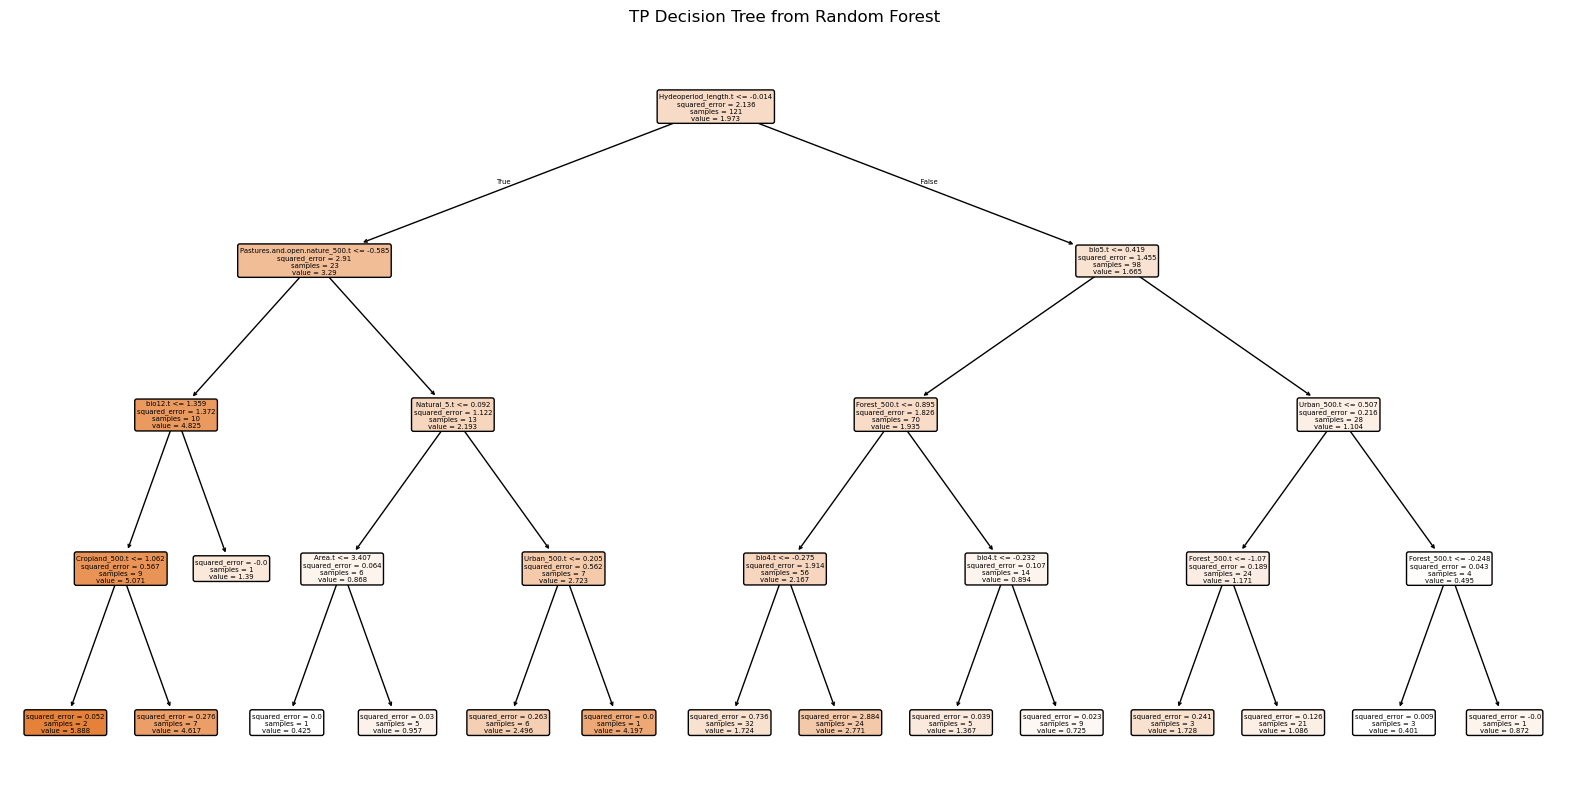

In [32]:
# Split the data into features (X) and target (y)
X = Phy_Che_random_forest_df[['Area_qt', 'Depth_qt','bio1_qt', 'bio4_qt', 'bio5_qt','bio12_qt','Hydeoperiod_length_qt',
       'Animals_cont_qt', 'Natural_5_qt','Aquatic_500_qt', 'Cropland_500_qt', 'Forest_500_qt',
       'Pastures.and.open.nature_500_qt','Urban_500_qt']]

y = Phy_Che_random_forest_df['TN']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Fitting Random Forest Regression to the dataset
regressor = RandomForestRegressor(n_estimators=10, random_state=0, oob_score=True,max_depth=4)
 
# Fit the regressor with x and y data
regressor.fit(X_train, y_train)

# Evaluating the model

# Access the OOB Score
oob_score = regressor.oob_score_
print(f'Out-of-Bag Score: {oob_score}')

# Making predictions on the same data or new data
predictions = regressor.predict(X)

# Evaluating the model
mse = mean_squared_error(y, predictions)
print(f'Mean Squared Error: {mse}')

r2 = r2_score(y, predictions)
print(f'R-squared: {r2}')


# Assuming regressor is your trained Random Forest model
# Pick one tree from the forest, e.g., the first tree (index 0)
tree_to_plot = regressor.estimators_[0]

# Plot the decision tree
plt.figure(figsize=(20, 10))
plot_tree(tree_to_plot, feature_names=X.columns_qtolist(), filled=True, rounded=True, fontsize=5)
plt_qtitle("TP Decision Tree from Random Forest")
plt.show()